In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import os
import sys
sys.path.append("../scripts/")
import warnings
import numpy as np
import eval_metrics as evaluation
import load_data as data_load
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [15]:
path_to_csv = '../dataset/dataset.csv'
test_size = 0.3
random_seed = 1

In [16]:
X_train, X_test, y_train, y_test, sens_train, sens_test= data_load.load_preprocessing_split(path_to_csv, split_data = True, unawareness= True,
                                                                                         test_size=test_size, random_state=random_seed)
                                                                                        

### Logistic Regression Model

In [17]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [18]:
mymask= sens_test.Gender
LR_dp, LR_Eo, LR_fpr, LR_acc, LR_recall, LRpreds= evaluation.model_metrics(logistic_model, X_test, y_test, mask=mymask,  fair_metrics= True)
maleLR_dp, maleLR_Eo, maleLR_fpr, maleLR_acc, maleLR_recall, LRpreds = evaluation.model_metrics(logistic_model, X_test, y_test, mask=1-mymask,  fair_metrics= True)

In [19]:
maleLR_dp, maleLR_Eo, maleLR_fpr, maleLR_acc, maleLR_recall

(0.1882750845546787,
 0.7213930348258707,
 0.03206997,
 0.9120631341600902,
 0.7213930348258707)

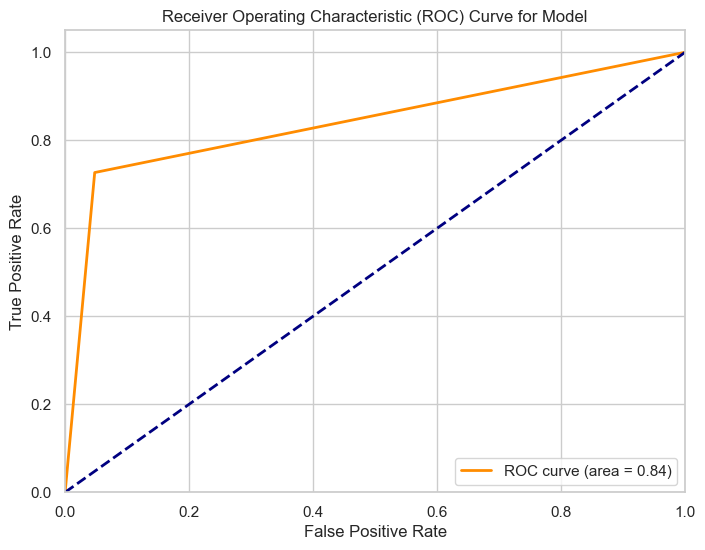

In [59]:
evaluation.plot_roc_curve(y_test, LRpreds, model_name='Model')

In [20]:
# logistic_model

### Random Forest Classifier

In [21]:
rf_classfier = RandomForestClassifier()
rf_classfier.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
RF_dp, RF_Eo, RF_fpr, RF_acc, RF_recall, RFpreds= evaluation.model_metrics(rf_classfier, X_test, y_test, mask=mymask,  fair_metrics= True)
maleRF_dp, maleRF_Eo, maleRF_fpr, maleRF_acc, maleRF_recall, RFpreds= evaluation.model_metrics(rf_classfier, X_test, y_test, mask=1-mymask,  fair_metrics= True)

In [60]:
evaluation.plot_roc_curve(rf_classfier, RFpreds, model_name='RFModel')

ValueError: Expected array-like (array or non-string sequence), got RandomForestClassifier()

### DECISION TREE CLASSIFIER

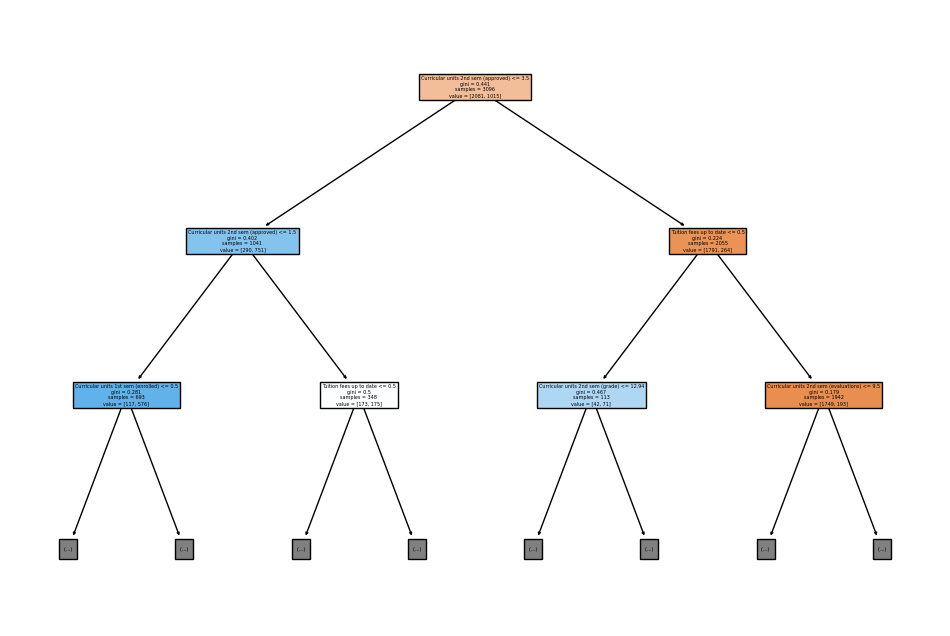

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
clf_preds = clf.predict(X_test)
clf_dp, clf_Eo, clf_fpr, clf_acc, clf_recall, clfpreds= evaluation.model_metrics(clf, X_test, y_test, mask=mymask,  fair_metrics= True)
maleclf_dp, maleclf_Eo, malelf_fpr, maleclf_acc, maleclf_recall, clfpreds = evaluation.model_metrics(clf, X_test, y_test, mask=1-mymask,  fair_metrics= True)

feature_names= X_test.columns.to_list()
plt.figure(figsize=(12, 8))
plot_tree(clf,max_depth = 2, filled=True, feature_names=feature_names)
plt.show()

In [24]:

# Convert numpy arrays to DataFrames
LRpreds_df = pd.DataFrame(LRpreds)
RFpreds_df = pd.DataFrame(RFpreds)
clfpreds_df = pd.DataFrame(clfpreds)
col_names = ['LRpredictions', 'RFpredictions', 'clfpredictions']
# Concatenate the DataFrames
concatenated_df = pd.concat([LRpreds_df, RFpreds_df, clfpreds_df], axis=1)
concatenated_df.columns = col_names

In [25]:
concatenated_df

,LRpredictions,RFpredictions,clfpredictions
0,1,1,1
1,0,0,0
2,0,0,0
3,0,0,1
4,1,0,1
...,...,...,...
1323,0,0,0
1324,1,1,1
1325,0,0,1
1326,0,0,0


In [26]:
concatenated_df[concatenated_df.nunique(axis=1) == 1]


,LRpredictions,RFpredictions,clfpredictions
0,1,1,1
1,0,0,0
2,0,0,0
6,0,0,0
7,0,0,0
...,...,...,...
1320,0,0,0
1321,0,0,0
1323,0,0,0
1324,1,1,1


In [27]:

# Define a dictionary for males
malemodels_eval = {
    "Metrics": ["Demographic Parity", "EO", "FPR", "Accuracy"],
    "Linear Regression": [maleLR_dp, maleLR_Eo, maleLR_fpr, maleLR_acc],
    "Random Forest": [maleRF_dp, maleRF_Eo, maleRF_fpr, maleRF_acc],
    "Decision Tree": [maleclf_dp, maleclf_Eo, malelf_fpr, maleclf_acc]
}

# Convert the dictionary to a pandas DataFrame
male_eval_df = pd.DataFrame(malemodels_eval)

# Display the DataFrame
male_eval_df

male_eval_dflatex_code = male_eval_df.to_latex(index=False, caption="Evaluation Metrics for Male Models", label="tab:male_models")
print(male_eval_dflatex_code)

\begin{table}
\caption{Evaluation Metrics for Male Models}
\label{tab:male_models}
\begin{tabular}{lrrr}
\toprule
Metrics & Linear Regression & Random Forest & Decision Tree \\
\midrule
Demographic Parity & 0.188275 & 0.183766 & 0.235626 \\
EO & 0.721393 & 0.701493 & 0.676617 \\
FPR & 0.032070 & 0.032070 & 0.106414 \\
Accuracy & 0.912063 & 0.907554 & 0.844419 \\
\bottomrule
\end{tabular}
\end{table}



In [28]:

# Define a dictionary for females
femalemodels_eval = {
    "Metrics": ["Demographic Parity", "EO", "FPR", "Accuracy"],
    "Linear Regression": [LR_dp, LR_Eo, LR_fpr, LR_acc],
    "Random Forest": [RF_dp, RF_Eo, RF_fpr, RF_acc],
    "Decision Tree": [clf_dp, clf_Eo, clf_fpr, clf_acc]
}

# Convert the dictionary to a pandas DataFrame
female_eval_df = pd.DataFrame(femalemodels_eval)

female_eval_dflatex_code = female_eval_df.to_latex(index=False, caption="Evaluation Metrics for female Models", label="tab:FEmale_models")
print(female_eval_dflatex_code)

# Display the DataFrame
female_eval_df

\begin{table}
\caption{Evaluation Metrics for female Models}
\label{tab:FEmale_models}
\begin{tabular}{lrrr}
\toprule
Metrics & Linear Regression & Random Forest & Decision Tree \\
\midrule
Demographic Parity & 0.390023 & 0.383220 & 0.462585 \\
EO & 0.731707 & 0.717073 & 0.736585 \\
FPR & 0.093220 & 0.093220 & 0.224576 \\
Accuracy & 0.825397 & 0.818594 & 0.757370 \\
\bottomrule
\end{tabular}
\end{table}



,Metrics,Linear Regression,Random Forest,Decision Tree
0,Demographic Parity,0.390023,0.383220,0.462585
1,EO,0.731707,0.717073,0.736585
2,FPR,0.093220,0.093220,0.224576
3,Accuracy,0.825397,0.818594,0.757370


In [29]:

# Define a dictionary for difference
models_eval = {
    "Metrics": ["Demographic Parity", "EO", "FPR", "Accuracy"],
    "Linear Regression": [LR_dp-maleLR_dp, LR_Eo-maleLR_Eo, LR_fpr-maleLR_fpr, LR_acc-maleLR_acc],
    "Random Forest": [RF_dp-maleRF_dp, RF_Eo-maleRF_Eo, RF_fpr-maleRF_fpr, RF_acc-maleRF_acc],
    "Decision Tree": [clf_dp-maleclf_dp, clf_Eo-maleclf_Eo, clf_fpr-malelf_fpr, clf_acc-maleclf_acc]
}

# Convert the dictionary to a pandas DataFrame
eval_df = pd.DataFrame(models_eval)

# Display the DataFrame
eval_df

,Metrics,Linear Regression,Random Forest,Decision Tree
0,Demographic Parity,0.201748,0.199454,0.226959
1,EO,0.010314,0.015581,0.059968
2,FPR,0.061150,0.061150,0.118162
3,Accuracy,-0.086666,-0.088959,-0.087050


In [53]:
# Convert the DataFrame to LaTeX format
latex_table = eval_df.to_latex(index=False, float_format="%.4f", caption="Differences in Evaluation Metrics between Male and Female for Different Models", label="tab:model_differences")

# Print the LaTeX table string
print(latex_table)

\begin{table}
\caption{Differences in Evaluation Metrics between Male and Female for Different Models}
\label{tab:model_differences}
\begin{tabular}{lrrr}
\toprule
Metrics & Linear Regression & Random Forest & Decision Tree \\
\midrule
Demographic Parity & 0.2017 & 0.1995 & 0.2270 \\
EO & 0.0103 & 0.0156 & 0.0600 \\
FPR & 0.0612 & 0.0612 & 0.1182 \\
Accuracy & -0.0867 & -0.0890 & -0.0870 \\
\bottomrule
\end{tabular}
\end{table}



### ENSURING FAIRNESS USING AIF360 LIBRARY

### Plots for Paper

In [30]:
import seaborn as sns

mydata_analysis = pd.read_csv(path_to_csv)

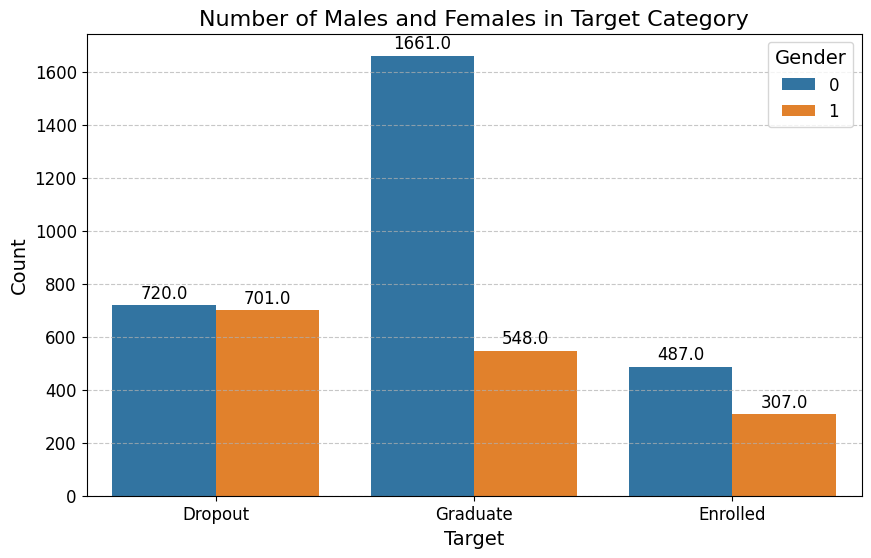

In [31]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=mydata_analysis, x='Target', hue='Gender', palette=['#1f77b4', '#ff7f0e'])

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Customizing the plot
plt.title('Number of Males and Females in Target Category', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Gender', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('target_gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

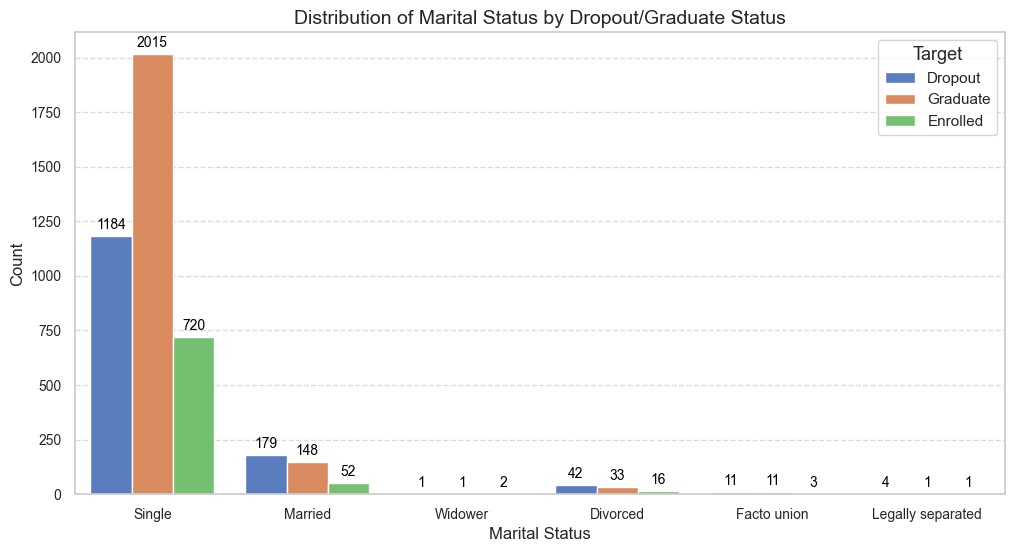

In [33]:
marital_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

mydata_analysis['MaritalStat'] = mydata_analysis['Marital status'].replace(marital_mapping)

# Define the annotate_counts function
def annotate_counts(ax, **kwargs):
    """Annotate the counts on the bars in the countplot."""
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):  # Only annotate if height is not NaN
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='baseline', 
                        fontsize=10, color='black', 
                        xytext=(0, 5), textcoords='offset points')

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='MaritalStat', hue='Target', data=mydata_analysis, order=marital_mapping.values(), palette='muted')

# Annotate counts on the bars
annotate_counts(ax)

# Customize the plot
plt.title('Distribution of Marital Status by Dropout/Graduate Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Target', title_fontsize='13', fontsize='11')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a high-resolution PNG file
plt.savefig('marital_status_target_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

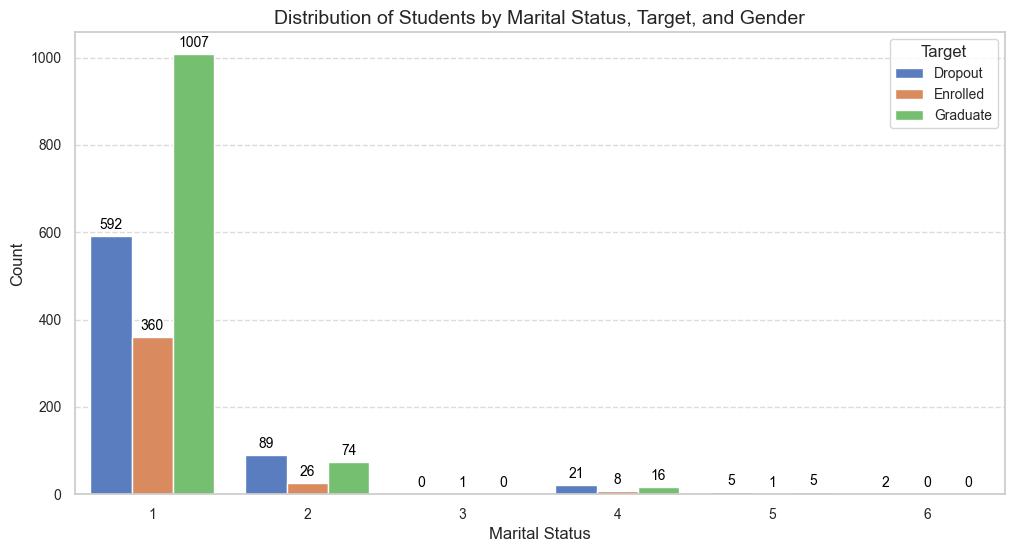

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataframe as per your provided data
data = {
    'marital_status': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6],
    'target': ['Dropout', 'Enrolled', 'Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Dropout', 'Enrolled', 'Graduate'],
    'male': [591, 433, 1528, 89, 36, 96, 1, 2, 0, 28, 14, 27, 8, 1, 9, 3, 1, 1],
    'female': [593, 287, 487, 90, 16, 52, 0, 0, 1, 14, 2, 6, 3, 2, 2, 1, 0, 0],
    'total': [1184, 720, 2015, 179, 52, 148, 1, 2, 1, 42, 16, 33, 11, 3, 11, 4, 1, 1]
}
df = pd.DataFrame(data)

# Melt the dataframe for easier plotting
df_melt = df.melt(id_vars=['marital_status', 'target'], value_vars=['male', 'female'], var_name='gender', value_name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create the bar plot
ax = sns.barplot(data=df_melt, x='marital_status', y='count', hue='target', ci=None, palette='muted')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Customizing the plot
plt.title('Distribution of Students by Marital Status, Target, and Gender', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Target', fontsize=10, title_fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('marital_status_target_gender_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [35]:
LR_accuracy, LR_f1_score, LR_recall_scores, LR_precision_score= evaluation.model_metrics(logistic_model, X_test, y_test, mask=mymask,  fair_metrics= False)


In [51]:
# Example usage:
LR_accuracy, LR_f1_score, LR_recall_scores, LR_precision_score= evaluation.model_metrics(logistic_model, X_test, y_test, mask=mymask, fair_metrics=False)
RF_accuracy, RF_f1_score, RF_recall_scores, RF_precision_score= evaluation.model_metrics(rf_classfier, X_test, y_test, mask=mymask, fair_metrics=False)
clf_accuracy, clf_f1_score, clf_recall_scores, clf_precision_score= evaluation.model_metrics(clf, X_test, y_test, mask=mymask, fair_metrics=False)

# Define the model names and metrics
models = [
    ("Logistic Regression",LR_accuracy, LR_f1_score, LR_recall_scores, LR_precision_score),
    ("Random Forest", RF_accuracy, RF_f1_score, RF_recall_scores, RF_precision_score),
    ("Decision Tree",clf_accuracy, clf_f1_score, clf_recall_scores, clf_precision_score)
]


# Create a pandas DataFrame
df = pd.DataFrame(models, columns=["Model", "Accuracy", "F1 Score", "Recall", "Precision"])

# Convert the DataFrame to LaTeX code
latex_table = df.to_latex(index=False, float_format="%.4f", caption="Model Performance Evaluation", label="tab:model_performance")

# Print the LaTeX table string
print(latex_table)

\begin{table}
\caption{Model Performance Evaluation}
\label{tab:model_performance}
\begin{tabular}{lrrrr}
\toprule
Model & Accuracy & F1 Score & Recall & Precision \\
\midrule
Logistic Regression & 0.8833 & 0.8801 & 0.8833 & 0.8824 \\
Random Forest & 0.8780 & 0.8742 & 0.8780 & 0.8772 \\
Decision Tree & 0.8155 & 0.8159 & 0.8155 & 0.8164 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
evaluation.plot_roc_curve(ytest_data, y_pred_proba, model_name='Model')

In [ ]:
logistic_model, X_test, y_test